Given a context

Created a 8x5 DataFrame:



C:\Users\jimmm\AppData\Local\Temp\ipykernel_26068\1216717066.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.heatmap(df.replace({True: 1, False: 0}), annot=df_display, fmt='', cmap='coolwarm', cbar=False)


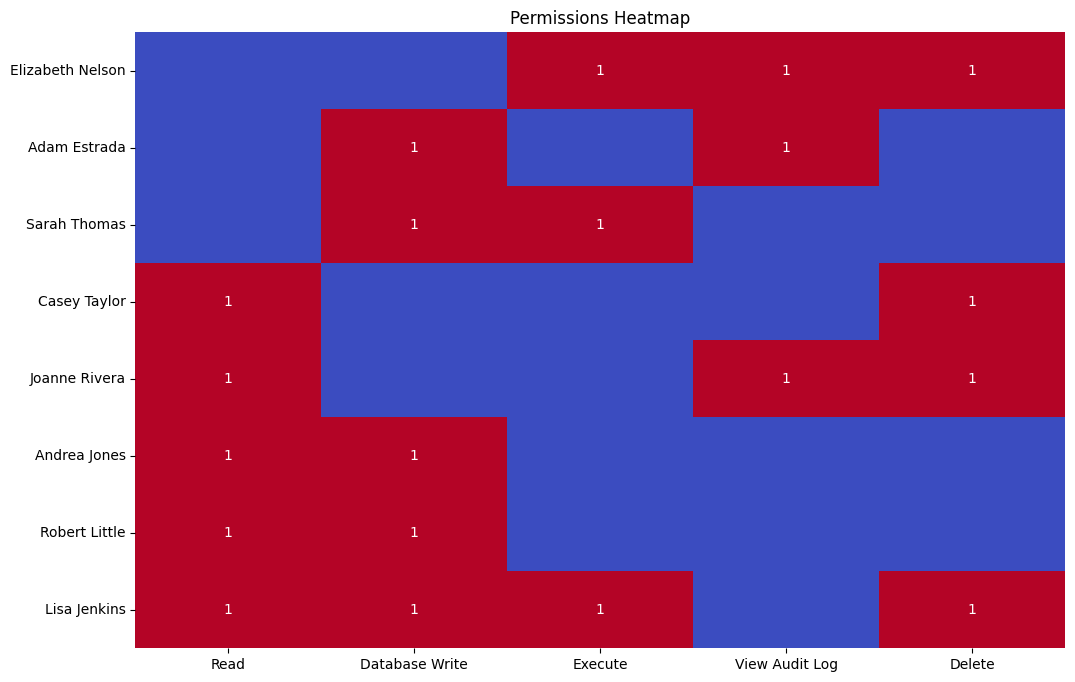

In [20]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Initialize Faker to generate fake data
fake = Faker()

# Define the size of the DataFrame
num_rows = 8
num_cols = 5

# --- Generate Row Labels (Random Names) ---
# Use a set to ensure uniqueness easily
unique_names = set()
while len(unique_names) < num_rows:
    unique_names.add(fake.name())
# Convert the set back to a list for the DataFrame index
row_labels = list(unique_names)

# --- Generate Column Headers (Random Security Permissions) ---
# Create a list of plausible permission-sounding words/phrases
possible_permissions = [
    "Read", "Write", "Execute", "Delete", "Admin Access",
    "View Audit Log", "Manage Users", "Create Reports", "Modify Settings",
    "Approve Requests", "Upload Files", "Download Files", "Share Content",
    "System Config", "Network Access", "Database Write", "Database Read",
    "API Access", "Grant Permission", "Revoke Permission"
]

# Ensure we have enough unique permissions to choose from
if len(possible_permissions) < num_cols:
    # If not, add generic ones
    needed = num_cols - len(possible_permissions)
    for i in range(needed):
        possible_permissions.append(f"GenericPerm{i+1}")

# Randomly sample unique permissions for the headers
column_labels = random.sample(possible_permissions, num_cols)

# --- Generate Random Data ---
# Create a 10x10 matrix of random boolean values (True/False)
# representing whether a user has a specific permission.
# You could also use random numbers (e.g., np.random.rand) if preferred.
data = np.random.choice([True, False], size=(num_rows, num_cols))

# --- Create the DataFrame ---
df = pd.DataFrame(data, index=row_labels, columns=column_labels)

# Sort the DataFrame based on each column from left to right
df = df.sort_values(by=df.columns.tolist(), ascending=True)

# --- Display the DataFrame ---
print(f"Created a {num_rows}x{num_cols} DataFrame:\n")
# Replace True with 1 and False with an empty string
df_display = df.replace({True: 1, False: ''})

# Display the modified DataFrame
# print(df_display)

# Display the DataFrame as a heatmap chart


plt.figure(figsize=(12, 8))
sns.heatmap(df.replace({True: 1, False: 0}), annot=df_display, fmt='', cmap='coolwarm', cbar=False)
plt.title("Permissions Heatmap")
plt.show()

# You can also inspect parts of it:
# print("\nDataFrame Info:")
# df.info()
# print("\nFirst 5 rows:")
# print(df.head())


find permisisons that we don't want to include in roles; permissions that only have a few members

In [21]:
# Count the number of assignments (occurrences of '1') for each permission
permission_counts = df_display.applymap(lambda x: 1 if x == 1 else 0).sum()

# Convert the result to a DataFrame for better readability
permission_summary = permission_counts.reset_index()
permission_summary.columns = ['Permission', 'Number of Assignments']
permission_summary = permission_summary.sort_values(by='Number of Assignments', ascending=True)
# Display the summary
print(permission_summary)

       Permission  Number of Assignments
3  View Audit Log                      3
2         Execute                      3
4          Delete                      4
1  Database Write                      5
0            Read                      5


C:\Users\jimmm\AppData\Local\Temp\ipykernel_26068\1035418235.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  permission_counts = df_display.applymap(lambda x: 1 if x == 1 else 0).sum()


Now remove low permisison counts from the matrix

In [22]:
filter_under = 2
# Filter permissions with x or more assignments

permissions_to_keep = permission_counts[permission_counts >= filter_under].index

# Update the df dataframe to only include these permissions
df = df[permissions_to_keep]

# Display the updated dataframe
print(df)

                   Read  Database Write  Execute  View Audit Log  Delete
Elizabeth Nelson  False           False     True            True    True
Adam Estrada      False            True    False            True   False
Sarah Thomas      False            True     True           False   False
Casey Taylor       True           False    False           False    True
Joanne Rivera      True           False    False            True    True
Andrea Jones       True            True    False           False   False
Robert Little      True            True    False           False   False
Lisa Jenkins       True            True     True           False    True


craft a table to generate a lattice

In [32]:
from tabulate import tabulate
import re

# Convert the dataframe to an ASCII table
ascii_table_no_horizontal = tabulate(df, headers='keys', tablefmt='pipe')
# Use regex to remove the header row with mostly hyphens
ascii_table_no_horizontal = re.sub(r'\|:.*\n', '', ascii_table_no_horizontal)

# Use regex to remove the very first pipe character in the ASCII table
ascii_table_no_horizontal = re.sub(r'^\|', '', ascii_table_no_horizontal, flags=re.MULTILINE)
# Replace '1' with 'X' and '0' with a blank space in the ASCII table
ascii_table_no_horizontal = ascii_table_no_horizontal.replace('1', 'X').replace('0', ' ')
print(ascii_table_no_horizontal)

                  |   Read |   Database Write |   Execute |   View Audit Log |   Delete |
 Elizabeth Nelson |        |                  |         X |                X |        X |
 Adam Estrada     |        |                X |           |                X |          |
 Sarah Thomas     |        |                X |         X |                  |          |
 Casey Taylor     |      X |                  |           |                  |        X |
 Joanne Rivera    |      X |                  |           |                X |        X |
 Andrea Jones     |      X |                X |           |                  |          |
 Robert Little    |      X |                X |           |                  |          |
 Lisa Jenkins     |      X |                X |         X |                  |        X |


In [ ]:
from concepts import Context
from concepts.visualize import lattice

# https://concepts.readthedocs.io/en/stable/manual.html#formal-contexts

# Convert the DataFrame to a formal context
context = Context.fromstring(ascii_table_no_horizontal)

# Eval the closest matching concept for two users
#context['Casey Taylor', ]
#context['Read','Database Write']



(('Andrea Jones', 'Robert Little', 'Lisa Jenkins'), ('Read', 'Database Write'))

In [ ]:
l = context.lattice
# Show the concept lattice
for extent, intent in l:
    print('%r %r' % (extent, intent))
# more general at the top, more specific at the bottom
# superconcepts, and subconcepts

() ('Read', 'Database Write', 'Execute', 'View Audit Log', 'Delete')
('Elizabeth Nelson',) ('Execute', 'View Audit Log', 'Delete')
('Adam Estrada',) ('Database Write', 'View Audit Log')
('Joanne Rivera',) ('Read', 'View Audit Log', 'Delete')
('Lisa Jenkins',) ('Read', 'Database Write', 'Execute', 'Delete')
('Elizabeth Nelson', 'Joanne Rivera') ('View Audit Log', 'Delete')
('Elizabeth Nelson', 'Lisa Jenkins') ('Execute', 'Delete')
('Sarah Thomas', 'Lisa Jenkins') ('Database Write', 'Execute')
('Elizabeth Nelson', 'Adam Estrada', 'Joanne Rivera') ('View Audit Log',)
('Elizabeth Nelson', 'Sarah Thomas', 'Lisa Jenkins') ('Execute',)
('Casey Taylor', 'Joanne Rivera', 'Lisa Jenkins') ('Read', 'Delete')
('Andrea Jones', 'Robert Little', 'Lisa Jenkins') ('Read', 'Database Write')
('Elizabeth Nelson', 'Casey Taylor', 'Joanne Rivera', 'Lisa Jenkins') ('Delete',)
('Adam Estrada', 'Sarah Thomas', 'Andrea Jones', 'Robert Little', 'Lisa Jenkins') ('Database Write',)
('Casey Taylor', 'Joanne Rivera',

In [48]:

l.supremum # top
l.infimum # bottom
#l[1]
#l['Execute',]
l.infimum.upper_neighbors # all the concepts that are more general than this one
l.supremum.lower_neighbors # all concepts that are more specific than this one

(<Concept {Adam Estrada, Sarah Thomas, Andrea Jones, Robert Little, Lisa Jenkins} <-> [Database Write] <=> Database Write>,
 <Concept {Casey Taylor, Joanne Rivera, Andrea Jones, Robert Little, Lisa Jenkins} <-> [Read] <=> Read>,
 <Concept {Elizabeth Nelson, Casey Taylor, Joanne Rivera, Lisa Jenkins} <-> [Delete] <=> Delete>,
 <Concept {Elizabeth Nelson, Adam Estrada, Joanne Rivera} <-> [View Audit Log] <=> View Audit Log>,
 <Concept {Elizabeth Nelson, Sarah Thomas, Lisa Jenkins} <-> [Execute] <=> Execute>)

In [ ]:
dot = l.graphviz()
#print(dot.source)

// <Lattice object of 4 atoms 16 concepts 5 coatoms at 0x1b732b676f0>
digraph Lattice {
	node [label="" shape=circle style=filled width=.25]
	edge [dir=none labeldistance=1.5 minlen=2]
	c0
	c1
	c1 -> c1 [color=transparent headlabel="Elizabeth Nelson" labelangle=270]
	c1 -> c0
	c2
	c2 -> c2 [color=transparent headlabel="Adam Estrada" labelangle=270]
	c2 -> c0
	c3
	c3 -> c3 [color=transparent headlabel="Joanne Rivera" labelangle=270]
	c3 -> c0
	c4
	c4 -> c4 [color=transparent headlabel="Lisa Jenkins" labelangle=270]
	c4 -> c0
	c5
	c5 -> c1
	c5 -> c3
	c6
	c6 -> c1
	c6 -> c4
	c7
	c7 -> c7 [color=transparent headlabel="Sarah Thomas" labelangle=270]
	c7 -> c4
	c8
	c8 -> c8 [color=transparent labelangle=90 taillabel="View Audit Log"]
	c8 -> c2
	c8 -> c5
	c9
	c9 -> c9 [color=transparent labelangle=90 taillabel=Execute]
	c9 -> c6
	c9 -> c7
	c10
	c10 -> c10 [color=transparent headlabel="Casey Taylor" labelangle=270]
	c10 -> c3
	c10 -> c4
	c11
	c11 -> c11 [color=transparent headlabel="Andrea Jone